<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Vector Representations
## *Data Science Unit 4 Sprint 2 Assignment 2*

In [32]:
import re
import string
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import spacy
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.neighbors import NearestNeighbors
from bs4 import BeautifulSoup

## 1) *Clean:* Job Listings from indeed.com that contain the title "Data Scientist" 

You have `job_listings.csv` in the data folder for this module. The text data in the description column is still messy - full of html tags. Use the [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) library to clean up this column. You will need to read through the documentation to accomplish this task. 

In [33]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import re
import spacy
from sklearn.feature_extraction.text import CountVectorizer

In [34]:
nlp = spacy.load("en_core_web_lg")

df = pd.read_csv('data/job_listings.csv')

In [35]:
df['parsed']= 'blank'
for i in range(len(df)):
    soup = BeautifulSoup(df['description'][i], 'html.parser')
    df['parsed'][i] = soup.get_text()
df['parsed'] = df['parsed'].apply(lambda x : x.replace('b"', ''))
df['parsed'] = df['parsed'].apply(lambda x : x.replace("b'", ''))
df['parsed'] = df['parsed'].apply(lambda x : x.replace("x99",""))
df['parsed'] = df['parsed'].apply(lambda x : x.replace("x9d",""))
df['parsed'] = df['parsed'].apply(lambda x : x.replace("xc2",""))
df['parsed'] = df['parsed'].apply(lambda x : x.replace("xe2",""))
df['parsed'] = df['parsed'].apply(lambda x : x.replace("xef",""))
df['parsed'] = df['parsed'].apply(lambda x : x.replace("x98",""))
df['parsed'] = df['parsed'].apply(lambda x : x.replace("x93",""))
df['parsed'] = df['parsed'].apply(lambda x : x.replace("x80",""))
df['parsed'] = df['parsed'].apply(lambda x : x.replace("x83",""))
df['parsed'] = df['parsed'].apply(lambda x : x.replace("xaf",""))
df['parsed'] = df['parsed'].apply(lambda x : x.replace("\\n"," "))
df['parsed'] = df['parsed'].apply(lambda x : re.sub('[^a-z A-Z 0-9]', ' ', x))

C:\Python\Anaconda3\envs\U4-S1-NLP\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [36]:
print(df['description'][0])

b"<div><div>Job Requirements:</div><ul><li><p>\nConceptual understanding in Machine Learning models like Nai\xc2\xa8ve Bayes, K-Means, SVM, Apriori, Linear/ Logistic Regression, Neural, Random Forests, Decision Trees, K-NN along with hands-on experience in at least 2 of them</p>\n</li><li><p>Intermediate to expert level coding skills in Python/R. (Ability to write functions, clean and efficient data manipulation are mandatory for this role)</p>\n</li><li><p>Exposure to packages like NumPy, SciPy, Pandas, Matplotlib etc in Python or GGPlot2, dplyr, tidyR in R</p>\n</li><li><p>Ability to communicate Model findings to both Technical and Non-Technical stake holders</p>\n</li><li><p>Hands on experience in SQL/Hive or similar programming language</p>\n</li><li><p>Must show past work via GitHub, Kaggle or any other published article</p>\n</li><li><p>Master's degree in Statistics/Mathematics/Computer Science or any other quant specific field.</p></li></ul><div><div><div><div><div><div>\nApply 

In [37]:
print(df['parsed'][0])

Job Requirements  Conceptual understanding in Machine Learning models like Nai  xa8ve Bayes  K Means  SVM  Apriori  Linear  Logistic Regression  Neural  Random Forests  Decision Trees  K NN along with hands on experience in at least 2 of them Intermediate to expert level coding skills in Python R   Ability to write functions  clean and efficient data manipulation are mandatory for this role  Exposure to packages like NumPy  SciPy  Pandas  Matplotlib etc in Python or GGPlot2  dplyr  tidyR in R Ability to communicate Model findings to both Technical and Non Technical stake holders Hands on experience in SQL Hive or similar programming language Must show past work via GitHub  Kaggle or any other published article Master s degree in Statistics Mathematics Computer Science or any other quant specific field  Apply Now 


## 2) Use Spacy to tokenize the listings 

In [38]:
df['tokens']= df['parsed'].apply(lambda x: nlp.tokenizer(x))

In [39]:
type(df['tokens'][0])

spacy.tokens.doc.Doc

In [40]:
df.shape

(426, 5)

## 3) Use Scikit-Learn's CountVectorizer to get word counts for each listing.

In [41]:
cv = CountVectorizer()          
dtm = cv_fit=cv.fit_transform(list(df['parsed']))
print(dtm)


  (0, 4374)	1
  (0, 6605)	1
  (0, 1724)	1
  (0, 8139)	1
  (0, 3999)	7
  (0, 4770)	1
  (0, 4568)	1
  (0, 5094)	1
  (0, 4641)	2
  (0, 5210)	1
  (0, 8679)	1
  (0, 932)	1
  (0, 4916)	1
  (0, 7646)	1
  (0, 674)	1
  (0, 4652)	1
  (0, 4712)	1
  (0, 6481)	1
  (0, 5283)	1
  (0, 6339)	1
  (0, 3316)	1
  (0, 2162)	1
  (0, 8029)	1
  (0, 5326)	1
  (0, 509)	1
  :	:
  (425, 6534)	1
  (425, 8394)	1
  (425, 2750)	1
  (425, 2136)	1
  (425, 6475)	1
  (425, 1026)	2
  (425, 3635)	1
  (425, 5415)	1
  (425, 6893)	1
  (425, 1350)	8
  (425, 6284)	1
  (425, 6063)	1
  (425, 6722)	1
  (425, 858)	1
  (425, 6631)	1
  (425, 4800)	1
  (425, 4329)	1
  (425, 6815)	1
  (425, 1709)	1
  (425, 5397)	1
  (425, 1696)	1
  (425, 3966)	1
  (425, 3272)	1
  (425, 7093)	1
  (425, 4625)	1


In [42]:
print(cv.get_feature_names())

['00', '000', '02115', '03', '0305', '0356', '04', '062', '06366', '08', '10', '100', '1000', '1001', '1008', '100k', '100x', '1026036', '105', '1079302', '1082692', '10b', '10ms', '10x', '11', '110k', '112', '114157802', '12', '120', '125', '126', '130', '1315', '1324b', '138', '14', '140', '15', '150', '15000', '159m', '16', '1605', '165', '169334br', '17', '170', '17b', '18', '180', '180008jq', '18b', '19', '190', '190007ji', '19000bn4', '19000c1k', '19004162', '1901744', '1904', '1904labs', '1905', '19050', '1938', '1944', '1967', '1971', '1975', '1979', '1988', '199', '1994', '1999', '1b', '1st', '1strategy', '1tb', '20', '200', '2000', '200020183', '200041695', '2004', '2008', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2050', '21', '210', '2145', '2272', '24', '24m', '25', '250', '25256', '26', '260', '27', '28', '2nd', '2x', '30', '300', '30328', '30bn', '30k', '31', '317', '320', '3201', '33', '33051', '338', '35', '350', '3535', '35million

## 4) Visualize the most common word counts

<AxesSubplot:>

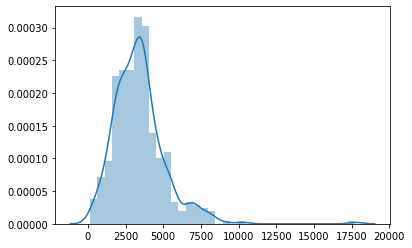

In [43]:
vect = CountVectorizer(stop_words='english', max_features=10)
data = list(df['parsed'])
#Learn our Vocab
vect.fit(data)

# Get sparse dtm
dtm = vect.transform(data)

dtm = pd.DataFrame(dtm.todense(), columns=vect.get_feature_names())
doc_len = [len(doc) for doc in data]
sns.distplot(doc_len)

## 5) Use Scikit-Learn's tfidfVectorizer to get a TF-IDF feature matrix

In [81]:
##data = list(df['parsed'])
tfidf = TfidfVectorizer(stop_words='english', max_features=500)
dtm2 = tfidf.fit_transform(data)
dtm2 = pd.DataFrame(dtm2.todense(), columns=tfidf.get_feature_names())
dtm2.sample(17)

,ability,able,access,achieve,action,actionable,ad,additional,address,advanced,...,work,working,workplace,works,world,writing,written,www,year,years
211,0.000000,0.000000,0.000000,0.000000,0.064630,0.000000,0.000000,0.000000,0.000000,0.040648,...,0.076868,0.033771,0.066118,0.0,0.000000,0.000000,0.048370,0.0,0.000000,0.030963
328,0.000000,0.000000,0.096145,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.120938,...,0.038117,0.050239,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.046062
15,0.000000,0.000000,0.000000,0.000000,0.071822,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.113895,0.000000,0.000000,0.0,0.000000,0.150499,0.000000,0.0,0.000000,0.034409
178,0.042962,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.051172,...,0.064513,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.077960
292,0.000000,0.000000,0.000000,0.080266,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.064347,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.116639
92,0.048557,0.155608,0.045980,0.000000,0.045980,0.000000,0.046767,0.043392,0.048471,0.057837,...,0.109373,0.000000,0.000000,0.0,0.000000,0.000000,0.034412,0.0,0.000000,0.022028
289,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.050006,0.065910,0.000000,0.0,0.146407,0.000000,0.000000,0.0,0.000000,0.060429
213,0.020341,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.081220,0.072684,...,0.015272,0.020129,0.000000,0.0,0.000000,0.040361,0.028831,0.0,0.000000,0.018455
160,0.054538,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.122844,0.053970,0.000000,0.0,0.059943,0.000000,0.000000,0.0,0.000000,0.049483
222,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.046970,0.030954,0.000000,0.0,0.034379,0.000000,0.000000,0.0,0.000000,0.028380


## 6) Create a NearestNeighbor Model. Write the description of your ideal datascience job and query your job listings. 

In [82]:
data[0][:200]

'Job Requirements  Conceptual understanding in Machine Learning models like Nai  xa8ve Bayes  K Means  SVM  Apriori  Linear  Logistic Regression  Neural  Random Forests  Decision Trees  K NN along with'

In [83]:
nn = NearestNeighbors(n_neighbors= 5, algorithm='kd_tree')
nn.fit(dtm2)

NearestNeighbors(algorithm='kd_tree', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [84]:
nn.kneighbors([dtm2.iloc[1].values]) #returns minkowski dist and doc numbers

(array([[0.        , 1.08360511, 1.10283871, 1.10558001, 1.10764876]]),
 array([[  1, 399, 222, 201, 121]], dtype=int64))

In [85]:
print(data[1][:200])
print(data[355][:200])
print(data[417][:2021])

Job Description  As a Data Scientist 1  you will help us build machine learning models  data pipelines  and micro services to help our clients navigate their healthcare journey  You will do so by empo
 82 000 a yearThe Innovation Center at Clearwater Analytics solves significant problems with new technology and techniques  The Innovation Center explores and uses machine learning  RPA  blockchain an
About the Role     Logic2020 is looking to secure a Data Analyst for a pilot program with a client of ours  The program involves using true machine learning to improve customer care process  at the enterprise level   You will be part of the team proving the value of machine learning in order to bring artificial intelligence into customer care and ultimately  change the way customers are served   About You     This is ideal for someone who has recently moved into the data science space and understands some of the basics  Someone who is excited to learn more and grow as an individual  within a

In [86]:
text = [''' Machine learning models Python coding 
            language highly self motivated team environment 
            renewable energy mission to mars make a real 
            impact on society fast paced remote diversity
            8 9 000 logic pandas seaborn github medium post
            articles podcast ''']
model_food = tfidf.transform(text)
model_food

<1x500 sparse matrix of type '<class 'numpy.float64'>'
	with 16 stored elements in Compressed Sparse Row format>

In [87]:
nn.kneighbors(model_food.todense())

(array([[1.23326167, 1.23357277, 1.23440999, 1.23853695, 1.24701715]]),
 array([[311, 302, 417,  56, 121]], dtype=int64))

In [88]:
dtm2.shape

(426, 500)

In [89]:
model_food.todense().shape

(1, 500)

In [91]:
print(model_food)

  (0, 447)	0.14075681550646085
  (0, 402)	0.2939626576394262
  (0, 369)	0.2710233421635791
  (0, 361)	0.14211124759950422
  (0, 285)	0.3654394081897132
  (0, 284)	0.17773734644450528
  (0, 280)	0.2939626576394262
  (0, 256)	0.23025706021914746
  (0, 254)	0.1654329690751887
  (0, 241)	0.15206507621546766
  (0, 232)	0.26396220711846424
  (0, 201)	0.23397004934084914
  (0, 195)	0.2774396601207811
  (0, 165)	0.30740386389464286
  (0, 149)	0.21714557903490933
  (0, 126)	0.3194109334185439


In [96]:
print(data[311][:2000])
print("\n")
print(data[302][:2000])
print("\n")
print(data[417][:2000])

The company   AppZen delivers the world   s leading AI platform for modern finance teams  Starting with business spend  we automate manual process  uncover problems  and optimize decision making for enterprises around the globe  including one fourth of the Fortune 500  Our platform combines patented deep learning  computer vision  and semantic analysis with intelligence from thousands of online data sources to understand financial transactions in business context and make decisions before those transactions happen  AppZen is a must have for CFOs and their teams to reduce spend  achieve compliance  and streamline process   We   ve taken off this year  Since we released our platform in 2016  nearly 1 000 enterprises have standardized on AppZen  including three of the top ten banks  four of the top ten media companies  three of the top ten pharmaceutical manufacturers  two of the top five aerospace companies  and five of the top ten software providers  We were a Gartner Cool Vendor last y

## Stretch Goals

 - Try different visualizations for words and frequencies - what story do you want to tell with the data?
 - Scrape Job Listings for the job title "Data Analyst". How do these differ from Data Scientist Job Listings
 - Try and identify requirements for experience specific technologies that are asked for in the job listings. How are those distributed among the job listings?
 - Use a clustering algorithm to cluster documents by their most important terms. Do the clusters reveal any common themes?
  - **Hint:** K-means might not be the best algorithm for this. Do a little bit of research to see what might be good for this. Also, remember that algorithms that depend on Euclidean distance break down with high dimensional data.
 - Create a labeled dataset - which jobs will you apply for? Train a model to select the jobs you are most likely to apply for. :) 